<a href="https://colab.research.google.com/github/Pragna235/K-Nearest-Neighbors-Algorithm/blob/main/Social_Network_Ads_using_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Social Network Ads Dataset using KNN Algorithm

Importing Modules

In [ ]:
# Load libraries
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.model_selection import train_test_split

Loading Dataset

In [ ]:
data = pd.read_csv("/content/Social_Network_Ads.csv")
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
data.tail()

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


In [ ]:
data.shape

(400, 5)

In [ ]:
data.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [ ]:
# Number of instances that belong to each class
print(data.groupby('Purchased').size())

Purchased
0    257
1    143
dtype: int64


Here, our `gender` attribute is of categorical type. We have to convert it into numerical using OneHotEncoder.

In [ ]:
data = pd.get_dummies(data,columns=["Gender"])
data.head()

,User ID,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
0,15624510,19,19000,0,0,1
1,15810944,35,20000,0,0,1
2,15668575,26,43000,0,1,0
3,15603246,27,57000,0,1,0
4,15804002,19,76000,0,0,1


In [ ]:
data.shape

(400, 6)

Let's rearrange our dataset column order


In [ ]:
data.columns

Index(['User ID', 'Age', 'EstimatedSalary', 'Purchased', 'Gender_Female',
       'Gender_Male'],
      dtype='object')

In [ ]:
new_cols = ['User ID', 'Gender_Female',
       'Gender_Male','Age', 'EstimatedSalary', 'Purchased' ]
data = data.reindex(columns = new_cols)
data.head()

,User ID,Gender_Female,Gender_Male,Age,EstimatedSalary,Purchased
0,15624510,0,1,19,19000,0
1,15810944,0,1,35,20000,0
2,15668575,1,0,26,43000,0
3,15603246,1,0,27,57000,0
4,15804002,0,1,19,76000,0


Check for duplicates

In [ ]:
data.duplicated().sum()

0

No duplicate rows

Check for missing values.

In [ ]:
data.isnull().sum()

User ID            0
Gender_Female      0
Gender_Male        0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

NO, missing values

Data Visualization

Text(0, 0.5, 'Count')

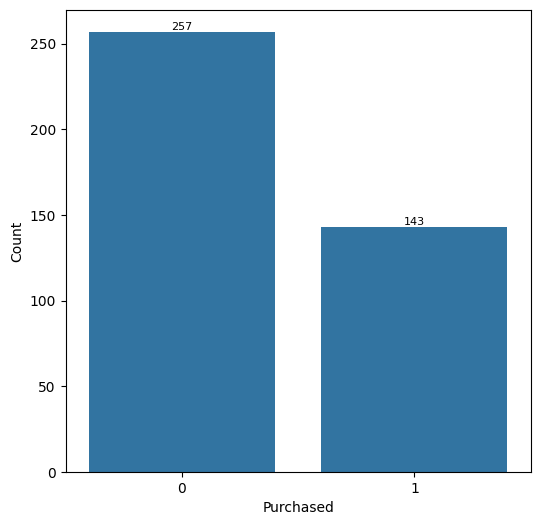

In [ ]:
# Checking the balance of the data by plotting the count of outcomes by their values

plt.figure(figsize=(6,6))
fh_status = sns.countplot(x='Purchased', data=data)

for number, count in enumerate(data['Purchased'].value_counts()):
    fh_status.text(number, count, str(count), ha='center', va='bottom', fontsize=8, color='black')

#plt.xticks([0, 1, 2], ['Setosa', 'Versicolor', 'Virginica'])
plt.xlabel('Purchased')
plt.ylabel('Count')

Feature Scaling

(array([-2000000.,        0.,  2000000.,  4000000.,  6000000.,  8000000.,
        10000000., 12000000., 14000000., 16000000., 18000000.]),
 [Text(0, -2000000.0, '−0.2'),
  Text(0, 0.0, '0.0'),
  Text(0, 2000000.0, '0.2'),
  Text(0, 4000000.0, '0.4'),
  Text(0, 6000000.0, '0.6'),
  Text(0, 8000000.0, '0.8'),
  Text(0, 10000000.0, '1.0'),
  Text(0, 12000000.0, '1.2'),
  Text(0, 14000000.0, '1.4'),
  Text(0, 16000000.0, '1.6'),
  Text(0, 18000000.0, '1.8')])

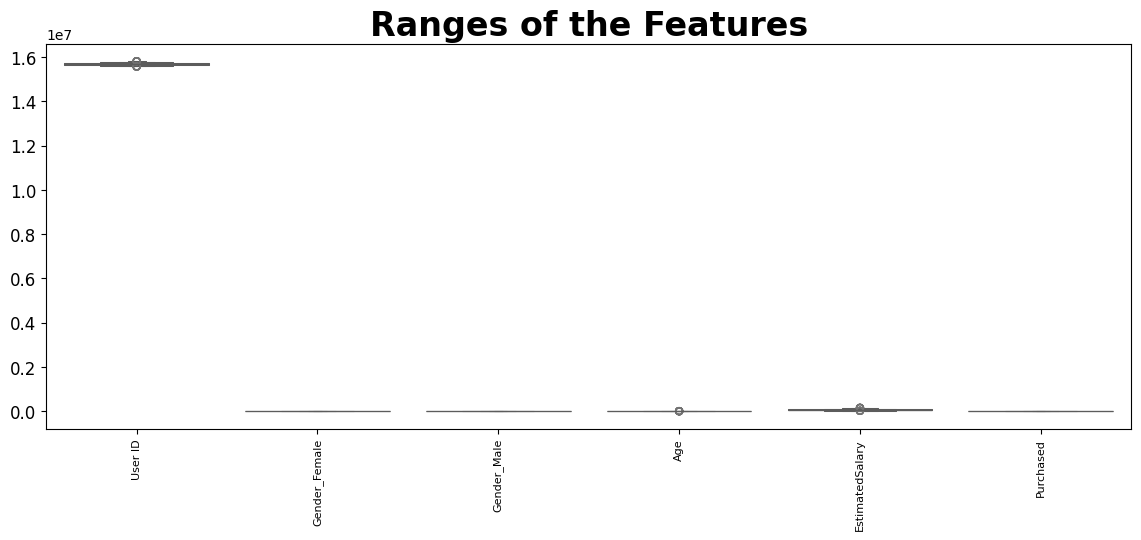

In [ ]:
# Ranges of the features
plt.figure(figsize=(14, 5))
sns.boxenplot(data=data, palette='coolwarm')

plt.title('Ranges of the Features',
          fontsize=24,
          fontweight='bold')
plt.xticks(rotation=90, fontsize=8)
plt.yticks(fontsize=12)

In [ ]:
# Splitting data into features (X) and outcomes (y)
X = data.drop(["Purchased"], axis=1)
y = data["Purchased"]

In [ ]:
# Set up a standard scaler for the features
col_names = list(X.columns)
s_scaler = StandardScaler()

X_df = s_scaler.fit_transform(X)
X_df = pd.DataFrame(X_df, columns=col_names)

In [ ]:
X_df.describe().T

,count,mean,std,min,25%,50%,75%,max
User ID,400.0,-4.161116e-15,1.001252,-1.744488,-0.905089,0.039148,0.821913,1.728357
Gender_Female,400.0,-8.881784e-18,1.001252,-1.020204,-1.020204,0.980196,0.980196,0.980196
Gender_Male,400.0,8.881784e-18,1.001252,-0.980196,-0.980196,-0.980196,1.020204,1.020204
Age,400.0,-7.105427e-17,1.001252,-1.877311,-0.755031,-0.062561,0.797057,2.134241
EstimatedSalary,400.0,-1.776357e-17,1.001252,-1.607506,-0.785290,0.007561,0.536129,2.356750


(array([-3., -2., -1.,  0.,  1.,  2.,  3.]),
 [Text(0, -3.0, '−3'),
  Text(0, -2.0, '−2'),
  Text(0, -1.0, '−1'),
  Text(0, 0.0, '0'),
  Text(0, 1.0, '1'),
  Text(0, 2.0, '2'),
  Text(0, 3.0, '3')])

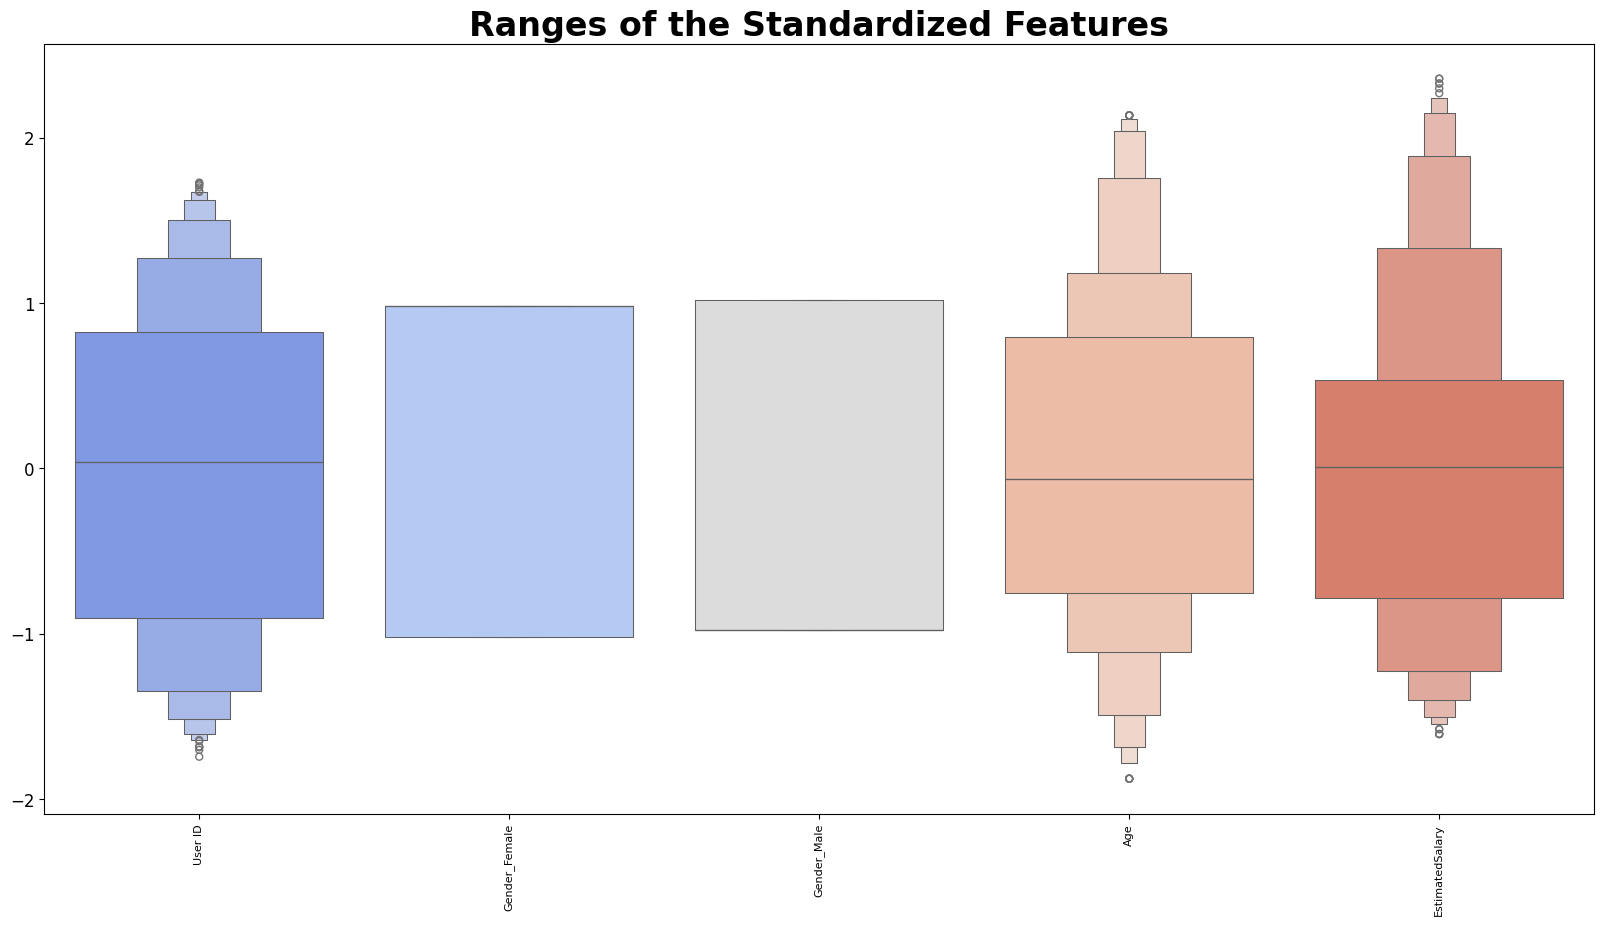

In [ ]:
# Plot the standardized features
plt.figure(figsize=(20, 10))
sns.boxenplot(data=X_df, palette='coolwarm')

plt.title('Ranges of the Standardized Features',
          fontsize=24,
          fontweight='bold')
plt.xticks(rotation=90, fontsize=8)
plt.yticks(fontsize=12)

Model Evaluation

In [ ]:
# Split the dataset into training and test set
X_train, X_test, y_train, y_test = train_test_split(X_df, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((320, 5), (80, 5), (320,), (80,))

KNN Algorithm

In [ ]:
test_scores=[]
train_scores=[]

for i in range(1,15):
  knn=KNeighborsClassifier(i)
  knn.fit(X_train,y_train)

  train_scores.append(knn.score(X_train,y_train))
  test_scores.append(knn.score(X_test,y_test))

In [ ]:
max_train_score = max(train_scores)
train_scores_ind = [i for i,v in enumerate(train_scores) if v==max_train_score]
print("Max train score = ",max_train_score*100," and k = ",list(map(lambda x:x+1,train_scores_ind)))

Max train score =  100.0  and k =  [1]


In [ ]:
max_test_score = max(test_scores)
test_scores_ind = [i for i,v in enumerate(test_scores) if v==max_test_score]
print("Max test score = ",max_test_score*100," and k = ",list(map(lambda x:x+1,test_scores_ind)))

Max test score =  93.75  and k =  [7]


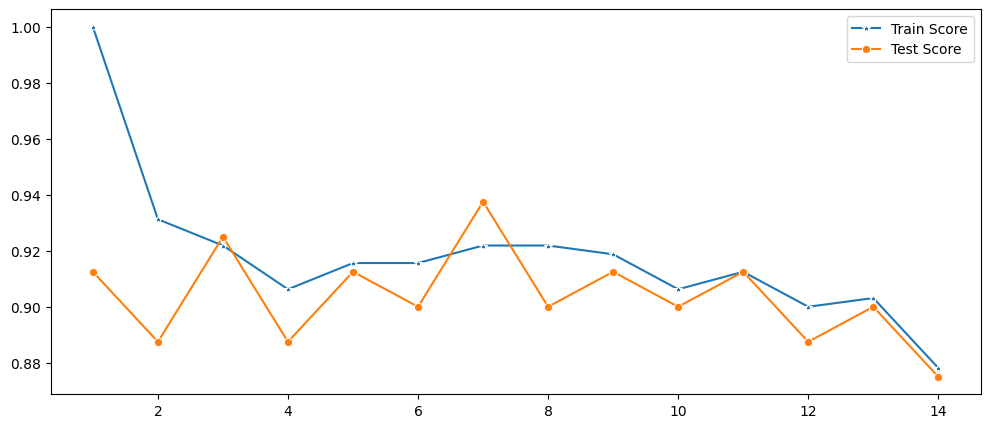

In [ ]:
plt.figure(figsize=(12,5))
p = sns.lineplot(x=range(1,15), y=train_scores,marker='*',label='Train Score')
p = sns.lineplot(x=range(1,15), y=test_scores,marker='o',label='Test Score')
plt.show()

Best score is captured at k=7

In [ ]:
knn = KNeighborsClassifier(7)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
y_pred = knn.predict(X_test)
print("Accuracy Score of KNN : ",accuracy_score(y_test,y_pred)*100)

Accuracy Score of KNN :  93.75


Text(0.5, 3.722222222222216, 'Predicted Label')

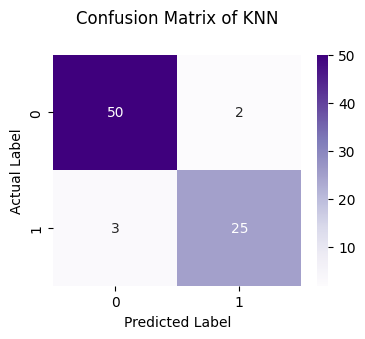

In [ ]:
cnf_matrix = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(4,3))
p = sns.heatmap((cnf_matrix),annot=True,cmap="Purples",fmt='g')
plt.title("Confusion Matrix of KNN",y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95        52
           1       0.93      0.89      0.91        28

    accuracy                           0.94        80
   macro avg       0.93      0.93      0.93        80
weighted avg       0.94      0.94      0.94        80

